# Artificial Neural Network
In this file, we implement different ANN classification models to compare it with our Machine Learning and CNN models.

We will run our ANN classification models on two csv files. The 30 seconds csv file containing audio features over for the whole audio, and 3 seconds csv contains audio feature at every 3 seconds intervals. 

In [1]:
# important modules
import numpy as np

np.random.seed(0)
import os
import warnings

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from nis_new_main_class import *
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from tqdm import tqdm

warnings.filterwarnings('ignore')
import seaborn as sns

sns.set()


/Users/home/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## 30 Seconds

In [2]:
df = pd.read_csv('./data/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df['label'] = df["label"].astype('category')
df['label'] = df["label"].cat.codes

In [4]:
df1 = df.drop(df.iloc[:, :19], 1)
df1 = df1.drop(df1.iloc[:, 1::2], 1)

In [5]:
df1.head()

,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704891,15.343150,-12.274110,10.976572,...,8.803792,-3.672300,5.747995,-5.162882,0.752740,-1.690215,-0.408979,-2.303523,1.221291,0
1,-207.501694,123.991264,8.955127,35.877647,2.907320,21.510466,-8.560436,23.370686,-10.099661,11.900497,...,5.376327,-2.231760,4.220140,-6.012148,0.927998,-0.731125,0.295073,-0.283518,0.531217,0
2,-90.722595,140.446304,-29.093889,31.684334,-13.984504,25.764742,-13.664875,11.639934,-11.783643,9.718760,...,5.791199,-8.907628,-1.077000,-9.229274,2.451690,-7.729093,-1.816407,-3.439720,-2.231258,0
3,-199.544205,150.090897,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286494,-0.759186,8.137607,...,6.079319,-2.480174,-1.079305,-2.870789,0.780874,-3.319597,0.636965,-0.619121,-3.407448,0
4,-160.337708,126.219635,-35.587811,22.148071,-32.478600,10.852294,-23.352329,0.498434,-11.793437,1.207256,...,-2.813867,-6.933385,-7.552725,-9.164666,-4.520576,-5.454034,-0.916874,-4.404827,-11.703234,0


In [6]:
# goood to see if there is any major correlation, nulls or any other key factors that we might miss
df_profile = df1[df1.columns[~df1.columns.isin(['label'])]]

# When ran the below commented line, the file is big (50 MB) so careful when opening/running it
# profile = ProfileReport(df_profiel)

# line below does about the same job, except it leaves our the scatter matrix between each feature
# allowing us to have smaller report html file.
profile = ProfileReport(df_profile, interactions={'continuous': False})

In [7]:
profile.to_file("30sec_report.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Reason for Duplicates
From the report generated above or [here](30sec_report.html), we see that we don't have nulls, but we do have some duplicates, it could be because a lot of mfcc features differ mostly in thousandth place or after, so alot of decimal places do end up matching which gives us duplicates. Also, there are only 7 signals with each having 1 duplicate, giving us 7 duplicates out of 1000, so not too bad.

In [7]:
# We will shuffle dataframe even though we have train_test_split, just to be on the safe side.
df1 = df1.sample(frac=1,random_state=0)

In [8]:
# First seperating features and labels
# X = Features
# y = labels
X = df1[df1.columns[~df1.columns.isin(['label'])]].to_numpy()
y = df1['label'].to_numpy()

In [9]:
# split the dataset wiht 30% set aside for the testing purpose, and random_state set to 0, 
# for same reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [10]:
X_train.shape, y_train.shape

((700, 20), (700,))

In [11]:
# one hot encoding our labels
y_true_train = one_hot(y_train, 10)
y_true_test = one_hot(y_test, 10)

In [21]:
# creating layers to pass it into our models
# we change layers here depending on what we want to pass in our model
outs=160
outs1=80
outs2=40
outs3=20

lay_train = [
    InputLayer(X_train),
    FullyConnectedLayer(len(X_train[0]), outs),
    ReLuLayer(),
    FullyConnectedLayer(outs, outs1),
    ReLuLayer(),
    FullyConnectedLayer(outs1, outs2),
    ReLuLayer(),
    FullyConnectedLayer(outs2, outs3),
    ReLuLayer(),
    FullyConnectedLayer(outs3, 10),
    SoftmaxLayer(),
    CrossEntropy()
]

layers_val = [
    InputLayer(X_test),
    FullyConnectedLayer(len(X_test[0]), outs),
    ReLuLayer(),
    FullyConnectedLayer(outs, outs1),
    ReLuLayer(),
    FullyConnectedLayer(outs1, outs2),
    ReLuLayer(),
    FullyConnectedLayer(outs2, outs3),
    ReLuLayer(),
    FullyConnectedLayer(outs3, 10),
    SoftmaxLayer(),
    CrossEntropy()
]

In [23]:
# running those given layers with our model function with specific given eta and epochs
# the eta and epochs shown below aren't final and are just shown as a demo to check if code works correctly

ll_train,y_pred_train,ll_val,y_pred_val,acc_train,acc_val, epochs, \
eta = model(X_train,y_train,X_test,y_test,lay_train, layers_val, eta=0.001, epochs=1000)

ll_train1,y_pred_train1,ll_val1,y_pred_val1,acc_train1,acc_val1, epochs1, \
eta1 = model(X_train,y_train,X_test,y_test,lay_train, layers_val, eta=0.001, epochs=1000)

ll_train2,y_pred_train2,ll_val2,y_pred_val2,acc_train2,acc_val2, epochs2, \
eta2 = model(X_train,y_train,X_test,y_test,lay_train, layers_val, eta=0.03, epochs=100)

100%|██████████| 100/100 [00:31<00:00,  3.13it/s]


In [46]:
# the graphs and accuracy you see below aren't the final ones we chose, 
# these are just demo runs to check if our code works fine

print('When we train and test our model with 30 seconds dataframe')
print()
print(f'When epochs = {epochs} and eta = {eta}:')
print(f'Training Accuracy: {round(acc_train[-1],2)}%, Testing Accuracy: {round(acc_val[-1],2)}%')
print()
print(f'When epochs = {epochs1} and eta = {eta1}:')
print(f'Training Accuracy: {round(acc_train1[-1],2)}%, Testing Accuracy: {round(acc_val1[-1],2)}%')

When we train and test our model with 30 seconds dataframe

When epochs = 1000 and eta = 0.001:
Training Accuracy: 96.91%, Testing Accuracy: 90.2%

When epochs = 1000 and eta = 0.001:
Training Accuracy: 98.0%, Testing Accuracy: 90.0%


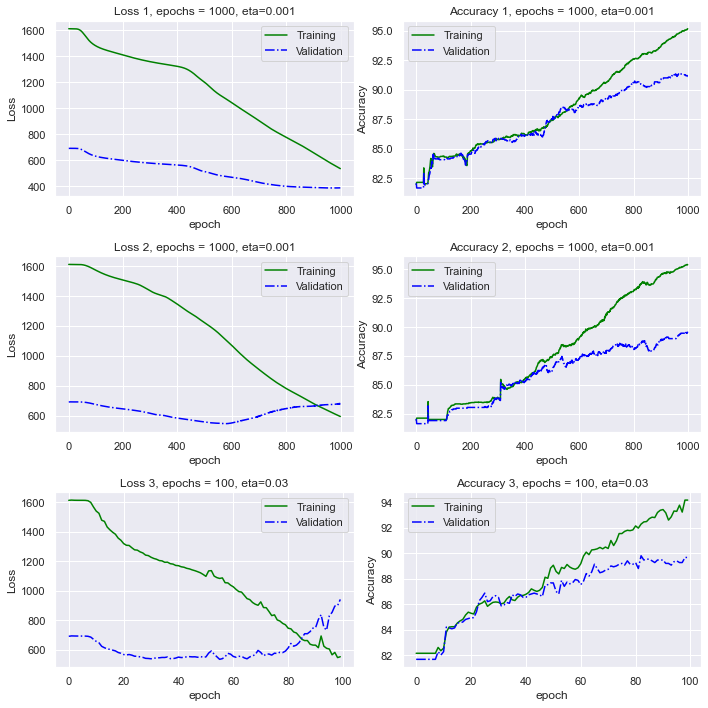

In [24]:
alls = [
    ll_train,ll_val,acc_train, acc_val,epochs, eta,
    ll_train1,ll_val1,acc_train1, acc_val1,epochs1, eta1,
    ll_train2,ll_val2,acc_train2, acc_val2,epochs2, eta2    
]

fig = plt.figure()
fig.set_size_inches(10,10)

create_graphs(alls,3,2)
fig.savefig('30_sec.png')

## 3 seconds
We will repeat same steps as we did for 30 seconds csv (dataframe)

In [25]:
df_short = pd.read_csv('./data/features_3_sec.csv')
df_short

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [26]:
df_short['label'] = df_short["label"].astype('category')
df_short['label'] = df_short["label"].cat.codes

In [27]:
df1_short = df_short.drop(df_short.iloc[:,:19],1)
df1_short = df1_short.drop(df1.iloc[:,1::2],1)

In [28]:
# goood to see if there is any major correlation, nulls or any other key factors that we might miss
df_profile1 = df1_short[df1_short.columns[~df1_short.columns.isin(['label'])]]

# When ran the below commented line, the file is big (50 MB) so careful when opening/running it
# profile = ProfileReport(df_profiel)

# line below does about the same job, except it leaves our the scatter matrix between each feature
# allowing us to have smaller report html file.
profile1 = ProfileReport(df_profile1, interactions={'continuous': False})

In [54]:
profile1.to_file("3sec_report.html")

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From the report generated above or [here](3sec_report.html), we see that we don't have nulls, but we do have some duplicates, it could be the same reason as we had for 30 seconds dataframe having 14 duplicates. [30seconds_reason](#Reason-for-Duplicates)

In [29]:
df1_short = df1_short.sample(frac=1,random_state=0)

In [30]:
X_short = df1_short[df1_short.columns[~df1_short.columns.isin(['label'])]].to_numpy()
y_short = df1_short['label'].to_numpy()

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_short, y_short, test_size=0.30, random_state=0)

In [32]:
y_true_train1 = one_hot(y_train1, 10)
y_true_test1 = one_hot(y_test1, 10)

In [46]:
outs=160
outs1=80
outs2=40
outs3=20

lay_train = [
    InputLayer(X_train1),
    FullyConnectedLayer(len(X_train1[0]), outs),
    SigmoidLayer(),
    FullyConnectedLayer(outs, outs1),
    SigmoidLayer(),
    FullyConnectedLayer(outs1, outs2),
    SigmoidLayer(),
    FullyConnectedLayer(outs2, outs3),
    SigmoidLayer(),
    FullyConnectedLayer(outs3, 10),
    SoftmaxLayer(),
    CrossEntropy()
]

layers_val = [
    InputLayer(X_test1),
    FullyConnectedLayer(len(X_test1[0]), outs),
    SigmoidLayer(),
    FullyConnectedLayer(outs, outs1),
    SigmoidLayer(),
    FullyConnectedLayer(outs1, outs2),
    SigmoidLayer(),
    FullyConnectedLayer(outs2, outs3),
    SigmoidLayer(),
    FullyConnectedLayer(outs3, 10),
    SoftmaxLayer(),
    CrossEntropy()
]

In [47]:
# running those given layers with our model function with specific given eta and epochs
# the eta and epochs shown below aren't final and are just shown as a demo to check if code works correctly

# 19
ll_train3, y_pred_train3, ll_val3, y_pred_val3, acc_train3, acc_val3, epochs3, \
eta3 = model(X_train1, y_train1, X_test1, y_test1, lay_train, layers_val, eta = 0.001, epochs = 100)

ll_train4, y_pred_train4, ll_val4, y_pred_val4, acc_train4, acc_val4, epochs4, \
eta4 = model(X_train1, y_train1, X_test1, y_test1, lay_train, layers_val, eta = 0.001, epochs = 100)

ll_train5, y_pred_train5, ll_val5, y_pred_val5, acc_train5, acc_val5, epochs5, \
eta5 = model(X_train1, y_train1, X_test1, y_test1, lay_train, layers_val, eta = 0.03, epochs = 100)

100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


In [ ]:
# the graphs and accuracy you see below aren't the final ones we chose, 
# these are just demo runs to check if our code works fine

print('When we train and test our model with 3 seconds dataframe')
print()
print(f'When epochs = {epochs3} and eta = {eta3}:')
print(f'Training Accuracy: {round(acc_train3[-1],2)}%, Testing Accuracy: {round(acc_val3[-1],2)}%')
print()
print(f'When epochs = {epochs4} and eta = {eta4}:')
print(f'Training Accuracy: {round(acc_train4[-1],2)}%, Testing Accuracy: {round(acc_val4[-1],2)}%')


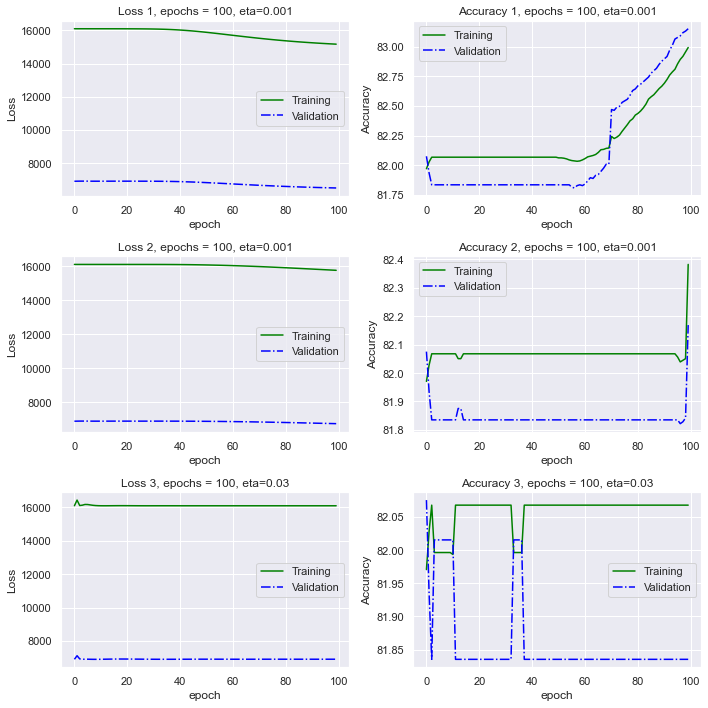

In [49]:

alls=[
    ll_train3, ll_val3, acc_train3,  acc_val3, epochs3,  eta3,
    ll_train4, ll_val4, acc_train4,  acc_val4, epochs4,  eta4,     
    ll_train5, ll_val5, acc_train5,  acc_val5, epochs5,  eta5,
     ]

fig = plt.figure()
fig.set_size_inches(10, 10)

create_graphs(alls, 3, 2)
fig.savefig('3_sec.png')